### <u>Data sample used</u> :
Run2017D/SingleElectron/NANOAOD/UL2017_MiniAODv2_JMENanoAODv9-v1/2500000/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root

### Import the necessary packages

In [37]:
import uproot as ur
import awkward as ak
import numpy as np
import hist
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import vector
vector.register_awkward()

### Load the data

In [38]:
events = ur.open("data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root:Events")
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
nboostedTau          | uint32_t                 | AsDtype('>u4')
boostedTau_charge... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_eta       | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_mass      | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_neutra... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_phi       | float[]                  | AsJ

In [39]:
elec = events.arrays(filter_name="Electron*", how = "zip")
elec["Electron"].fields

['dEscaleDown',
 'dEscaleUp',
 'dEsigmaDown',
 'dEsigmaUp',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'cleanmask']

In [40]:
pt = elec.Electron.pt
hist.Hist.new.Reg(100,0,200).Double().fill(ak.flatten(pt))

Hist(Regular(100, 0, 200, label='Axis 0'), storage=Double()) # Sum: 353824.0 (356933.0 with flow)

In [41]:
eta = elec.Electron.eta
hist.Hist.new.Reg(100,-4,4).Double().fill(ak.flatten(eta))

Hist(Regular(100, -4, 4, label='Axis 0'), storage=Double()) # Sum: 356933.0

In [42]:
elec = elec["Electron"]
e = ak.zip({"pt":elec.pt, "eta":elec.eta,"phi":elec.phi, "mass":elec.mass, "q":elec.charge, "ID":elec.cutBased}, with_name="Momentum4D")
e

<MomentumArray4D [[{pt: 54.5, eta: -0.754, ... ID: 4}]] type='297347 * var * Mom...'>

### Apply the cuts

In [43]:
e_cut = e[e.pt > 30 ]
e_cut = e_cut[e_cut.eta > -2.5]
e_cut = e_cut[e_cut.eta < 2.5]
e_cut

<MomentumArray4D [[{pt: 54.5, eta: -0.754, ... ID: 4}]] type='297347 * var * Mom...'>

In [44]:
print(e_cut.ID)

[[4], [4], [], [4], [0], [3], [1], [4], ... [0], [3], [], [0], [4], [], [4], [4]]


In [45]:
e_cut =  e_cut[e_cut.ID == 4] # 4 corresponds to tight ID
e_cut

<MomentumArray4D [[{pt: 54.5, eta: -0.754, ... ID: 4}]] type='297347 * var * Mom...'>

In [46]:
elec_eta = ak.packed(e_cut.eta)
elec_pt = ak.packed(e_cut.pt)

In [47]:
hist_eta = hist.Hist.new.Reg(60,-3,3).Double()
hist_eta.fill(ak.flatten(elec_eta))
hist_eta

Hist(Regular(60, -3, 3, label='Axis 0'), storage=Double()) # Sum: 167046.0

In [48]:
hist_pt = hist.Hist.new.Reg(100,0,120).Double()
hist_pt.fill(ak.flatten(elec_pt))
hist_pt

Hist(Regular(100, 0, 120, label='Axis 0'), storage=Double()) # Sum: 164935.0 (167046.0 with flow)

In [49]:
comb = ak.combinations(e_cut, 2 )
elec1 , elec2 = ak.unzip(comb)
print(comb)

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [50]:
os_cuts = (elec1.q != elec2.q)
elec1 = elec1[os_cuts]
elec2 = elec2[os_cuts]

### Perform Calculations

In [51]:
dielec = (elec1 + elec2).mass
dielec = dielec[ak.num(dielec) > 0]
dielec = ak.Array([i[0] for i in ak.sort(dielec, ascending=False)])
dielec

<Array [93, 123, 64.4, ... 91.9, 91.5, 86.7] type='7601 * float64'>

### Plot the results

In [52]:
hist_dielec = hist.Hist.new.Reg(100,0,200).Double()
hist_dielec.fill(dielec)
hist_dielec

Hist(Regular(100, 0, 200, label='Axis 0'), storage=Double()) # Sum: 7559.0 (7601.0 with flow)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

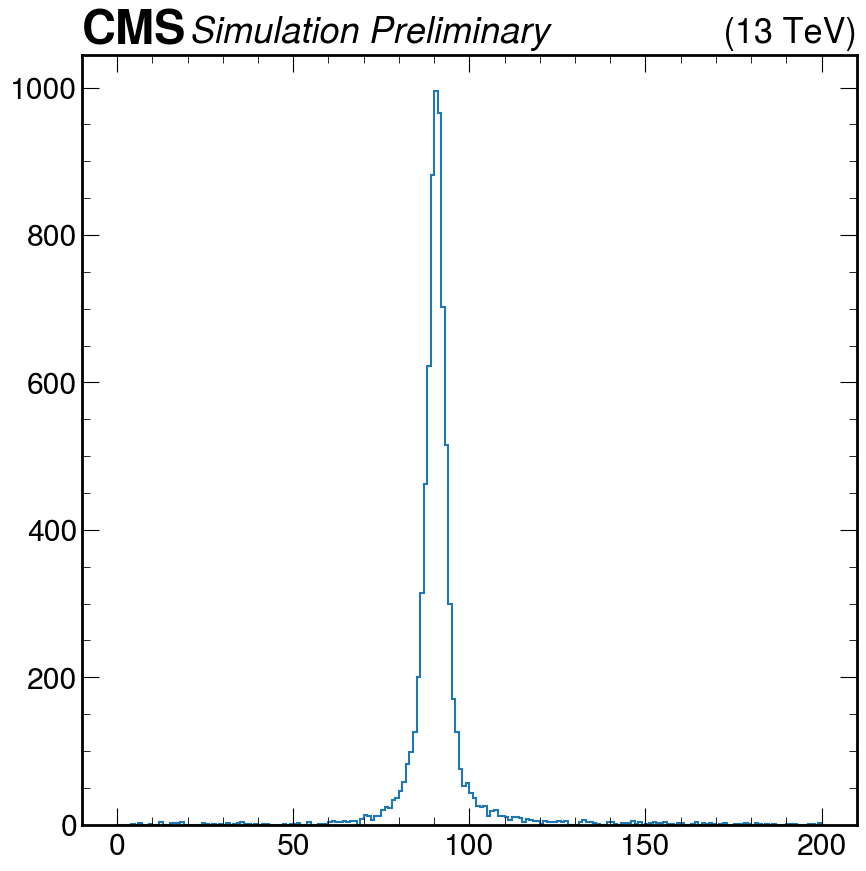

In [53]:
hist, bins = np.histogram(dielec.to_numpy(), bins=200, range=(0, 200))
hep.histplot(hist,bins=bins)
hep.cms.label("Preliminary")

In [54]:
import ROOT 

Welcome to JupyROOT 6.28/04


In [55]:
%jsroot
h = ROOT.TH1F("Zmass","Z invariant mass",200,0,200)
h.GetXaxis().SetTitle("M (GeV)")
h.GetYaxis().SetTitle("Events")
for i in dielec.to_numpy() :
    h.Fill(i)
c = ROOT.TCanvas()
h.Draw()
c.Draw()